In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [4]:
df = pd.read_csv("preprocessed_sales.csv", parse_dates=["InvoiceDate"])
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
# Create a new column "InvoiceMonth" with a datetime object representing the first day of the month of each transaction
df['InvoiceMonth'] = df['InvoiceDate'].apply(lambda x: datetime.datetime(x.year, x.month, 1))

# Create a new column "CohortMonth" with a datetime object representing the first month that a customer made a purchase
df['CohortMonth'] = df.groupby('CustomerId')['InvoiceMonth'].transform('min')

df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country,InvoiceMonth,CohortMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009-12-01


In [6]:
# Define a function to extract the year and month from a datetime column in a Pandas DataFrame
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

# Extract the year and month from the "InvoiceMonth" and "CohortMonth" columns using the get_date_int function
invoice_year, invoice_month = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month  = get_date_int(df, 'CohortMonth')

# Calculate the difference in years and months between the "InvoiceMonth" and "CohortMonth" columns
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

# Calculate the "CohortIndex" column by converting the difference in years and months to months, and adding one
df['CohortIndex'] = years_diff * 12 + months_diff + 1

# Select only the "CohortMonth" and "CohortIndex" columns of the DataFrame
df[['CohortMonth', 'CohortIndex']]

,CohortMonth,CohortIndex
0,2009-12-01,1
1,2009-12-01,1
2,2009-12-01,1
3,2009-12-01,1
4,2009-12-01,1
...,...,...
400911,2009-12-01,13
400912,2009-12-01,13
400913,2009-12-01,13
400914,2009-12-01,13


In [7]:
# Group the DataFrame by "CohortMonth" and "CohortIndex"
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique customer IDs in each (cohort month, cohort index) group
cohort_data = grouping['CustomerId'].apply(pd.Series.nunique)

# Reset the index of the DataFrame to create a flat table with columns for cohort month, cohort index, and customer count
cohort_data = cohort_data.reset_index()

# Reshape the DataFrame so that the columns represent the "CohortIndex" values,
# the rows represent the "CohortMonth" values, and the cell values represent the count of unique customer IDs
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerId')

cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,403.0,473.0,237.0
2010-01-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,116.0,38.0,NaN
2010-02-01,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,27.0,NaN,NaN
2010-03-01,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,35.0,NaN,NaN,NaN
2010-04-01,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,20.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,40.0,43.0,44.0,45.0,65.0,54.0,20.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,270.0,47.0,51.0,55.0,62.0,77.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,186.0,29.0,34.0,55.0,54.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,162.0,33.0,48.0,52.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Select the first column of the "cohort_counts" DataFrame, which represents the count of customers in each cohort group
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the entire "cohort_counts" DataFrame by the "cohort_sizes" series, row-wise, to create a matrix of customer retention rates
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Multiply the entire "retention" DataFrame by 100 and round to two decimal places to create human-readable percentages
# retention = retention.round(2) * 100
retention = retention * 100

retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,100.0,35.287958,33.403141,42.513089,38.010471,35.916230,37.696335,34.240838,33.612565,36.230366,42.198953,49.528796,24.816754
2010-01-01,100.0,20.626632,31.070496,30.548303,26.370757,30.026110,25.848564,22.976501,27.937337,31.853786,30.287206,9.921671,NaN
2010-02-01,100.0,23.796791,22.459893,29.144385,24.598930,20.053476,19.251337,28.609626,25.401070,27.540107,7.219251,NaN,NaN
2010-03-01,100.0,18.961625,23.024831,24.153499,23.250564,20.316027,24.604966,30.248307,27.539503,7.900677,NaN,NaN,NaN
2010-04-01,100.0,19.387755,19.387755,16.326531,18.367347,22.448980,27.551020,26.190476,6.802721,NaN,NaN,NaN,NaN
2010-05-01,100.0,15.748031,16.929134,17.322835,17.716535,25.590551,21.259843,7.874016,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,17.407407,18.888889,20.370370,22.962963,28.518519,6.666667,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,15.591398,18.279570,29.569892,29.032258,10.215054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,20.370370,29.629630,32.098765,11.728395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Retention rates')

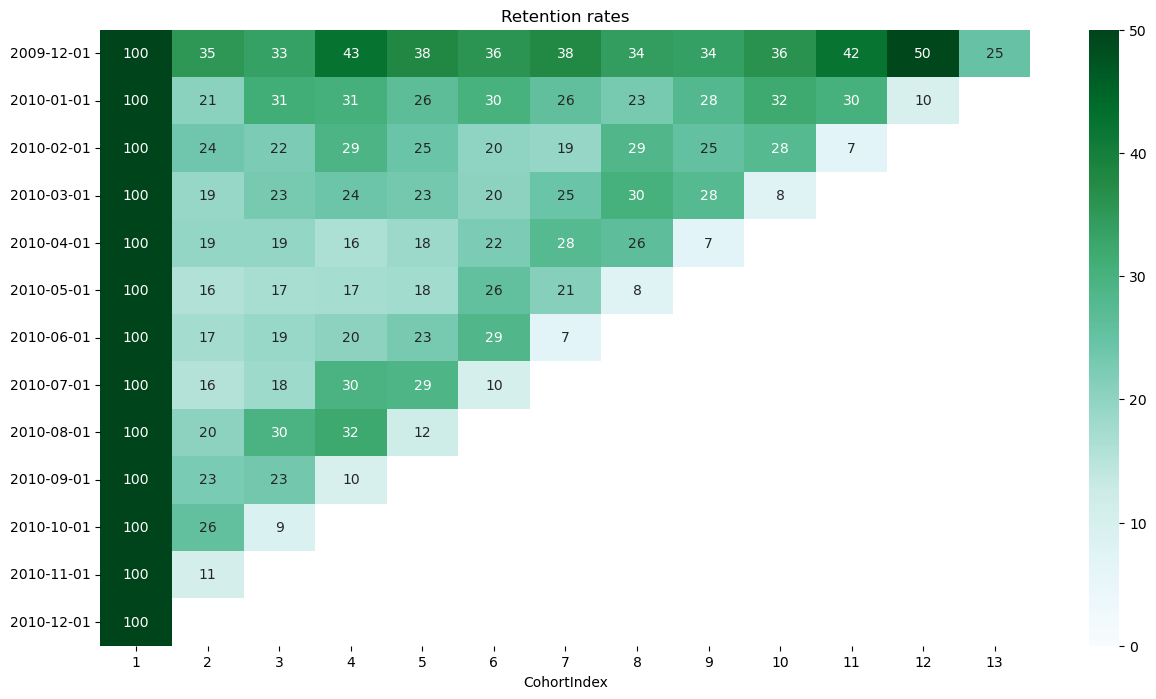

In [9]:
# Convert the index of the "retention" DataFrame to a date-based index for better labeling on the heatmap
retention.index = retention.index.date

fig, ax = plt.subplots(figsize=(15, 8))

# Create a heatmap using Seaborn's `sns.heatmap` function
ax = sns.heatmap(data = retention, annot = True,
                 fmt=".0f",
                 vmin = 0,
                 vmax = 50,
                 cmap = 'BuGn'
                    )
ax.set_title("Retention rates")